In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import collections

import dataset.cs1110fa18 as cs1110
import dataset.cs4410sp20 as cs4410
import dataset.cs4820fa20 as cs4820

In [2]:
# removes the 1000 most common english words to be able to see class specific vocab
# https://gist.github.com/deekayen/4148741
common = []
file = open('common', encoding="utf8")
f= file.read()
for word in f.lower().split():
    common += [word]

In [11]:
sample_text = "\n".join(cs4410.data) + \
    "\n".join(cs1110.data) + "\n".join(cs4820.data)
sample_text = sample_text.lower()

# all char histogram
sample_text = [char for char in sample_text]

# char without spaces or newlines
# sample_text = [char for char in sample_text if char not in [' ', '\n']]

# char of only letters
# sample_text = [char for char in sample_text if char in list("abcdefghijklmnopqrstuvwxyz")]

# char of alphanumerals
# sample_text = [char for char in sample_text if char in list("abcdefghijklmnopqrstuvwxyz1234567890")]

# char of numbers
# sample_text = [char for char in sample_text if char in list("1234567890")]

# word histogram
# sample_text = sample_text.split()

([<matplotlib.axis.XTick at 0x7fc5920f2f70>,
 [Text(0, 0, '\t'),
  Text(1, 0, '\n'),
  Text(2, 0, ' '),
  Text(3, 0, '!'),
  Text(4, 0, '"'),
  Text(5, 0, '#'),
  Text(6, 0, '$'),
  Text(7, 0, '%'),
  Text(8, 0, '&'),
  Text(9, 0, "'"),
  Text(10, 0, '('),
  Text(11, 0, ')'),
  Text(12, 0, '*'),
  Text(13, 0, '+'),
  Text(14, 0, ','),
  Text(15, 0, '-'),
  Text(16, 0, '.'),
  Text(17, 0, '/'),
  Text(18, 0, '0'),
  Text(19, 0, '1'),
  Text(20, 0, '2'),
  Text(21, 0, '3'),
  Text(22, 0, '4'),
  Text(23, 0, '5'),
  Text(24, 0, '6'),
  Text(25, 0, '7'),
  Text(26, 0, '8'),
  Text(27, 0, '9'),
  Text(28, 0, ':'),
  Text(29, 0, ';'),
  Text(30, 0, '<'),
  Text(31, 0, '='),
  Text(32, 0, '>'),
  Text(33, 0, '?'),
  Text(34, 0, '@'),
  Text(35, 0, '['),
  Text(36, 0, '\\'),
  Text(37, 0, ']'),
  Text(38, 0, '^'),
  Text(39, 0, '_'),
  Text(40, 0, '`'),
  Text(41, 0, 'a'),
  Text(42, 0, 'b'),
  Text(43, 0, 'c'),
  Text(44, 0, 'd'),
  Text(45, 0, 'e'),
  Text(46, 0, 'f'),
  Text(47, 0, 'g'),
  

/home/harry/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harry/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harry/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harry/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harry/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/harry/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65309 

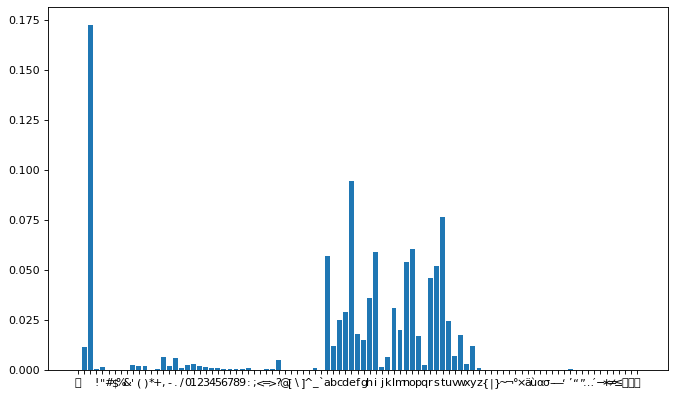

In [12]:
# use this for character level
# https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
labels, counts = np.unique(sample_text,return_counts=True)
counts = counts / sum(counts)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)

<AxesSubplot:xlabel='Word'>

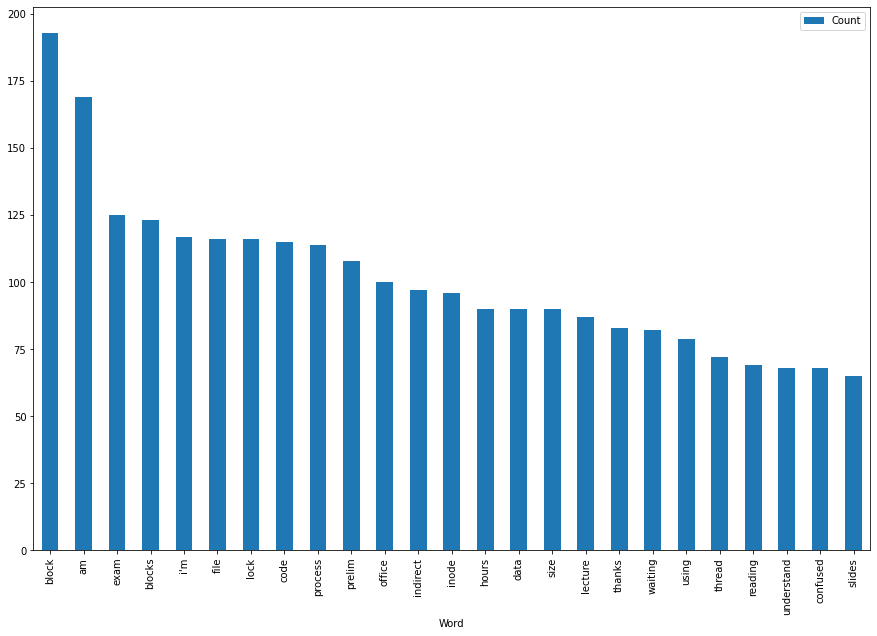

In [9]:
# use this for word level
# https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

wordcount = {}
for word in sample_text:
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("?","")
    word = word.replace("\n","")
    if word not in common[:500] and word not in list("1234567890"):
        # remove if statement to include common words
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
word_counter = collections.Counter(wordcount)
n_count = 25 # change this to see more words, might need to change figsize
lst = word_counter.most_common(n_count)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count', figsize=(15,10))